https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [17]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [2]:
file_path = r'C:\my-drive\git-repos\my-learning\my_ml_learning\data\breast_cancer.csv'


In [43]:
df = pd.read_csv(file_path, header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'


In [45]:
df.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'


## Plot Categorical features

<AxesSubplot:>

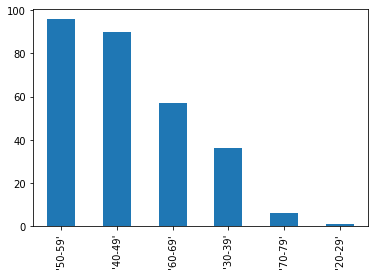

In [46]:
df['0'].value_counts().plot(kind='bar')

In [47]:
df.shape

(286, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       286 non-null    object
 1   1       286 non-null    object
 2   2       286 non-null    object
 3   3       286 non-null    object
 4   4       278 non-null    object
 5   5       286 non-null    object
 6   6       286 non-null    object
 7   7       285 non-null    object
 8   8       286 non-null    object
 9   9       286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


<IPython.core.display.Javascript object>

<AxesSubplot:>

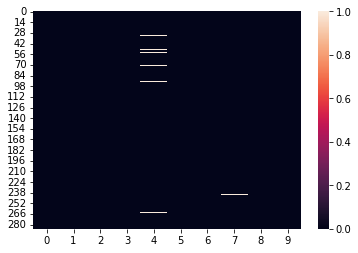

In [49]:
sns.heatmap(df.isnull())

In [50]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    8
5    0
6    0
7    1
8    0
9    0
dtype: int64

In [51]:
df1 = df.dropna(axis=0)
df1.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [52]:
dataset = df1.values
dataset

array([["'40-49'", "'premeno'", "'15-19'", ..., "'left_up'", "'no'",
        "'recurrence-events'"],
       ["'50-59'", "'ge40'", "'15-19'", ..., "'central'", "'no'",
        "'no-recurrence-events'"],
       ["'50-59'", "'ge40'", "'35-39'", ..., "'left_low'", "'no'",
        "'recurrence-events'"],
       ...,
       ["'30-39'", "'premeno'", "'30-34'", ..., "'right_up'", "'no'",
        "'no-recurrence-events'"],
       ["'50-59'", "'premeno'", "'15-19'", ..., "'left_low'", "'no'",
        "'no-recurrence-events'"],
       ["'50-59'", "'ge40'", "'40-44'", ..., "'right_up'", "'no'",
        "'no-recurrence-events'"]], dtype=object)

In [33]:
type(dataset)

numpy.ndarray

In [58]:
X = dataset[:,:-1]
X = X.astype(str)
X

array([["'40-49'", "'premeno'", "'15-19'", ..., "'right'", "'left_up'",
        "'no'"],
       ["'50-59'", "'ge40'", "'15-19'", ..., "'right'", "'central'",
        "'no'"],
       ["'50-59'", "'ge40'", "'35-39'", ..., "'left'", "'left_low'",
        "'no'"],
       ...,
       ["'30-39'", "'premeno'", "'30-34'", ..., "'right'", "'right_up'",
        "'no'"],
       ["'50-59'", "'premeno'", "'15-19'", ..., "'right'", "'left_low'",
        "'no'"],
       ["'50-59'", "'ge40'", "'40-44'", ..., "'left'", "'right_up'",
        "'no'"]], dtype='<U11')

In [57]:
X

(277, 9)

In [59]:
y = dataset[:,-1]
y.shape

(277,)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(185, 92, 185, 92)

In [69]:
sklearn.__version__

<IPython.core.display.Javascript object>

'0.23.1'

In [73]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [74]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
    

In [75]:
# Prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

ValueError: Found unknown categories ["'20-29'"] in column 0 during transform

In [64]:
df['0'].unique()

array(["'40-49'", "'50-59'", "'60-69'", "'30-39'", "'70-79'", "'20-29'"],
      dtype=object)